### 周末摆烂学的比较慢捏(又拖了好几天，最近ddl比较多 TAT ) 布尔索引 二三四维矩阵转置 交换 np.where（好用）线代基础运算 plt作图 随机漫步 

# 4.1.5 布尔索引

In [9]:
import numpy as np
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [12]:
data

array([[-0.51791902,  0.77100533,  0.58566445, -1.09122403],
       [ 1.13726517,  1.53749536, -1.47656806,  0.94267491],
       [ 1.58598119,  1.54414637, -0.57491096,  0.88742462],
       [-0.05851208, -0.44659627, -1.87716178,  0.31035535],
       [-1.65446564, -0.10172619,  0.33552931, -0.14584808],
       [ 0.0758564 ,  0.15596079,  0.19108738, -1.01261018],
       [-0.81494929,  2.43268551,  1.02185675,  0.93364709]])

In [11]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [10]:
data[names == 'Bob']

array([[-0.51791902,  0.77100533,  0.58566445, -1.09122403],
       [-0.05851208, -0.44659627, -1.87716178,  0.31035535]])

In [13]:
data[names == 'Bob', 2:]

array([[ 0.58566445, -1.09122403],
       [-1.87716178,  0.31035535]])

In [16]:
data[names == 'Bob', 3]

array([-1.09122403,  0.31035535])

In [17]:
names != 'Bob'
data[~(names == 'Bob')]
#用！= 或者在条件表达式前加~取反

array([[ 1.13726517,  1.53749536, -1.47656806,  0.94267491],
       [ 1.58598119,  1.54414637, -0.57491096,  0.88742462],
       [-1.65446564, -0.10172619,  0.33552931, -0.14584808],
       [ 0.0758564 ,  0.15596079,  0.19108738, -1.01261018],
       [-0.81494929,  2.43268551,  1.02185675,  0.93364709]])

In [18]:
mask = (names == 'Bob') | (names == 'Will')
mask
#布尔值中and和or无效，要用&和|

array([ True, False,  True,  True,  True, False, False])

In [19]:
data[mask]

array([[-0.51791902,  0.77100533,  0.58566445, -1.09122403],
       [ 1.58598119,  1.54414637, -0.57491096,  0.88742462],
       [-0.05851208, -0.44659627, -1.87716178,  0.31035535],
       [-1.65446564, -0.10172619,  0.33552931, -0.14584808]])

In [20]:
data[data < 0] = 0
data

array([[0.        , 0.77100533, 0.58566445, 0.        ],
       [1.13726517, 1.53749536, 0.        , 0.94267491],
       [1.58598119, 1.54414637, 0.        , 0.88742462],
       [0.        , 0.        , 0.        , 0.31035535],
       [0.        , 0.        , 0.33552931, 0.        ],
       [0.0758564 , 0.15596079, 0.19108738, 0.        ],
       [0.        , 2.43268551, 1.02185675, 0.93364709]])

In [21]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [1.13726517, 1.53749536, 0.        , 0.94267491],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.0758564 , 0.15596079, 0.19108738, 0.        ],
       [0.        , 2.43268551, 1.02185675, 0.93364709]])

# 4.1.6 神奇索引

In [22]:
arr = np.empty((8, 4))

for i in range(8):
    arr[i] = i#操作过程只有一维，就是对row进行赋值
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [23]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [24]:
arr[[-3, -5, -7]]
#在arr中挑

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [26]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [27]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
#抓[1,0] [5,3] [7,1] [2,2]

array([ 4, 23, 29, 10])

In [28]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
#每行按0312排列

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

# 4.1.7 数组转置和换轴

In [29]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [30]:
arr.T
#矩阵转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [32]:
arr = np.random.randn(6, 3)
arr

array([[-0.32052558, -0.87508021,  1.09085533],
       [-0.65720145,  1.24177414, -0.11207076],
       [-1.09405319, -0.79805557, -0.83896223],
       [ 0.23817472, -0.00544651, -1.13028508],
       [-0.89657451,  0.29396009,  1.10499022],
       [ 1.44004599, -0.34968573,  0.48107188]])

In [33]:
np.dot(arr.T, arr)
#矩阵相乘 .dot

array([[ 4.66590828, -0.43091281,  0.07472958],
       [-0.43091281,  3.15338339, -0.26145884],
       [ 0.07472958, -0.26145884,  4.63636072]])

In [34]:
arr = np.arange(16).reshape((2, 2, 4))# 2个2*4的矩阵
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [36]:
arr.transpose((1, 0, 2))
#前连个轴置换，最后一个不变 第1个的第0行与第0个的第一行交换

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [37]:
arr.T 
#(2, 2, 4)-->(4, 2, 2)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [38]:
arr.swapaxes(1, 2)
# (2, 2, 4)-->(2, 4, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 通用函数 ufunc

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.sqrt(arr)
#.sqrt 开根

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [41]:
np.exp(arr)
#.exp 取e=2.71为底的指数函数

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [42]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 0.75284122, -1.10092758,  0.19225706,  0.28953075, -0.63688116,
        1.20987686,  0.03398769, -0.34480485])

In [43]:
y

array([ 0.64819674, -0.61563211, -0.28574147, -0.3671137 ,  1.24542253,
       -1.89995525,  1.66650743,  1.80382164])

In [44]:
np.maximum(x, y)
#.maximum 取最大值

array([ 0.75284122, -0.61563211,  0.19225706,  0.28953075,  1.24542253,
        1.20987686,  1.66650743,  1.80382164])

In [54]:
arr = np.random.randn(7) * 5
arr

array([-9.8108259 , -1.62693325, -2.95051584, -3.58212201,  1.62511463,
       -2.28407173,  0.19966033])

In [55]:
remainder , whole_part = np.modf(arr)
remainder
#.modf 返回浮点数数组的小数部分和整数部分

array([-0.8108259 , -0.62693325, -0.95051584, -0.58212201,  0.62511463,
       -0.28407173,  0.19966033])

In [56]:
whole_part

array([-9., -1., -2., -3.,  1., -2.,  0.])

In [57]:
np.sqrt(arr)

<ipython-input-57-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan,        nan,        nan,        nan, 1.27479984,
              nan, 0.44683367])

In [58]:
arr

array([-9.8108259 , -1.62693325, -2.95051584, -3.58212201,  1.62511463,
       -2.28407173,  0.19966033])

In [59]:
np.sqrt(arr, arr)
#将结果写入arr内

<ipython-input-59-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan,        nan,        nan,        nan, 1.27479984,
              nan, 0.44683367])

In [60]:
arr

array([       nan,        nan,        nan,        nan, 1.27479984,
              nan, 0.44683367])

# 4.3 使用数组进行面向数组编程

In [61]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
xs
#.meshgrid 不用写循环

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [62]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [63]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

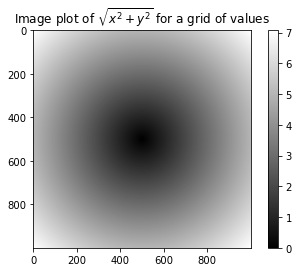

In [65]:
import matplotlib.pyplot as plt# matplotlib可视化，第九章会细嗦

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
# \做一些特殊运算 运算放在$ $中
plt.show()
#不知道要不要加

[Writing mathermatical expressions](https://matplotlib.org/users/mathtext.html)

# 4.3.1 将条件逻辑作为数组操作

In [2]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [3]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result
#如果c那么执行x否则执行y

[1.1, 2.2, 1.3, 1.4, 2.5]

In [4]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [5]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)
#np.where True-->x False-->y

array([[ 2, -2, -2, -2],
       [ 2, -2, -2, -2],
       [-2,  2,  2,  2],
       [-2, -2, -2, -2]])

In [6]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -1.90586239, -0.39056467, -0.65198701],
       [ 2.        , -0.20599829, -0.25251417, -0.4257103 ],
       [-0.90338645,  2.        ,  2.        ,  2.        ],
       [-0.37915296, -0.31703471, -1.34212158, -0.35945472]])

# 4.3.2 数学和统计方法

In [8]:
arr = np.random.randn(5, 4)
arr

array([[ 0.56852499,  1.06190968,  1.96748458, -0.97337495],
       [-0.65497248,  0.07788009, -0.44179296, -0.7954086 ],
       [-0.9769054 ,  0.23980548, -1.4728717 , -0.00429759],
       [-0.11968264,  0.21632123, -1.26022536,  0.31563797],
       [ 0.84198064,  0.100283  , -0.48442122, -1.28428311]])

In [9]:
arr.mean()
#平均数

-0.15392041740232057

In [10]:
np.mean(arr)

-0.15392041740232057

In [11]:
arr.sum()

-3.0784083480464113

In [12]:
arr.mean(axis=1)
#定y 横着求平均

array([ 0.65613608, -0.45357349, -0.5535673 , -0.2119872 , -0.20661017])

In [13]:
arr.sum(axis=0)
#定x 竖着求和

array([-0.3410549 ,  1.69619949, -1.69182667, -2.74172628])

In [14]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()
#累加

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [16]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [17]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [18]:
arr.cumprod(axis=1)
#.cumprod 累乘

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

# 4.3.3 布尔值数组的方法

In [20]:
arr = np.random.randn(100)
(arr > 0).sum()

62

In [21]:
bools = np.array([False, False, True, False])
bools.any()
#是否有一个True

True

In [22]:
bools.all()
#是否全是True
#布尔数组非0元素按True处理

False

# 4.3.4 排序

In [23]:
arr = np.random.randn(6)
arr

array([-0.12576672, -0.98237635,  1.17663898, -0.10926199, -0.03810058,
       -0.43048836])

In [24]:
arr.sort()
#从小到大排序

In [25]:
arr

array([-0.98237635, -0.43048836, -0.12576672, -0.10926199, -0.03810058,
        1.17663898])

In [26]:
arr = np.random.randn(5, 3)
arr

array([[ 1.11857299, -0.62125058, -0.40957633],
       [ 0.96777375,  0.6271789 , -0.91257175],
       [-0.22906793,  0.19177862, -0.42671222],
       [ 1.03198913, -0.80861442,  0.75630333],
       [-0.7941829 ,  0.22514604,  1.65246114]])

In [27]:
arr.sort(1)#确定axis值

In [28]:
arr

array([[-0.62125058, -0.40957633,  1.11857299],
       [-0.91257175,  0.6271789 ,  0.96777375],
       [-0.42671222, -0.22906793,  0.19177862],
       [-0.80861442,  0.75630333,  1.03198913],
       [-0.7941829 ,  0.22514604,  1.65246114]])

In [29]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6660324490323104

# 4.3.5 唯一值与其他集合逻辑

In [31]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
#sorted(set(names)) python中酱紫写
#唯一值再排序

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [32]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [33]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])
#.in1d检查一个数组中的值是否在另一个数组中

array([ True, False, False,  True,  True, False,  True])

# 4.4 使用数组进行文件输入和输出

In [34]:
arr = np.arange(10)
#np.save('some_array', arr) 将arr内容存入,后缀自动补为.npy

In [35]:
#np.load('some_array.npy')
#out[]:array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
#np.savez('array_archive.npz', a=arr, b=arr)
#arch = np.load('array_archive.npz')
#arch['b']
#有点看不懂，摆烂了，因为更多的输入输出操作可以用pandas做

In [37]:
#np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)
#存入压缩文件

# 4.5 线性代数(作业可以偷懒了捏^_^)

In [38]:
x = np.array([[1., 2., 3.],[4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [39]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [40]:
x.dot(y)
#矩阵点乘

array([[ 28.,  64.],
       [ 67., 181.]])

In [41]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [42]:
np.dot(x, np.ones(3))
#numpy很怪，不懂咋算的,好像是正常点乘然后变型

array([ 6., 15.])

In [43]:
np.dot(x, np.ones(3).reshape(3, 1))

array([[ 6.],
       [15.]])

In [45]:
x @ np.ones(3).reshape(3, 1)
# @可以用于点乘矩阵操作,不.reshape出来的就是Out[42]

array([[ 6.],
       [15.]])

In [52]:
from numpy.linalg import inv, qr
#numpy.linalg 线性代数库
X = np.random.randn(5, 5)
mat = X.T.dot(X)
# X的转置与X点乘
inv(mat)
# inv逆矩阵

array([[ 0.34661146, -0.19688191,  0.05331603, -0.14227472, -0.01478914],
       [-0.19688191,  0.2599935 , -0.01296593,  0.08852132, -0.0290256 ],
       [ 0.05331603, -0.01296593,  0.306874  , -0.20679221, -0.3179413 ],
       [-0.14227472,  0.08852132, -0.20679221,  0.40355515,  0.33011213],
       [-0.01478914, -0.0290256 , -0.3179413 ,  0.33011213,  0.84931919]])

In [54]:
mat.dot(inv(mat))
#就是单位矩阵，不知道出什么问题了变成了无穷小的东西

array([[ 1.00000000e+00, -7.43366458e-17,  1.08431565e-17,
        -1.86079466e-16, -1.41641931e-17],
       [-3.78963830e-18,  1.00000000e+00, -4.82576343e-18,
        -4.45706000e-17, -5.90567547e-18],
       [ 8.13843179e-18,  2.81760801e-18,  1.00000000e+00,
         7.07999038e-17, -5.19545462e-17],
       [-4.34066442e-17,  3.59027122e-17,  2.87780277e-17,
         1.00000000e+00, -1.15648180e-16],
       [ 4.28091582e-17, -1.89242408e-17,  2.49796866e-16,
        -2.04857296e-16,  1.00000000e+00]])

In [56]:
q, r = qr(mat)
r
#右上三角

array([[-6.83117259, -6.62394357,  0.60338175, -1.58570509,  0.56951212],
       [ 0.        , -4.39123806,  0.82734027,  3.84228978, -1.56702364],
       [ 0.        ,  0.        , -6.57941469, -2.48554793, -1.8018885 ],
       [ 0.        ,  0.        ,  0.        , -3.21503011,  1.65109303],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.0355802 ]])

In [57]:
q
#正交矩阵 逆矩阵等于正交矩阵

array([[-0.81427495,  0.38518008,  0.02949073,  0.43299925, -0.01531534],
       [-0.54197048, -0.76681221, -0.08241485, -0.33252268, -0.03005834],
       [ 0.05367679,  0.01449163, -0.93216462,  0.13989253, -0.32925371],
       [-0.19114832,  0.47347662, -0.23730922, -0.75239613,  0.34185759],
       [ 0.06168823, -0.19810408, -0.25902037,  0.34098455,  0.87953813]])

In [58]:
q.T.dot(q)
#单位矩阵！

array([[ 1.00000000e+00, -1.34573963e-16, -1.29280761e-18,
         1.65181610e-17,  1.50527857e-17],
       [-1.34573963e-16,  1.00000000e+00, -8.86475125e-18,
         4.33806964e-17, -3.37398516e-17],
       [-1.29280761e-18, -8.86475125e-18,  1.00000000e+00,
         2.20847875e-17, -3.08783839e-17],
       [ 1.65181610e-17,  4.33806964e-17,  2.20847875e-17,
         1.00000000e+00,  8.71519819e-17],
       [ 1.50527857e-17, -3.37398516e-17, -3.08783839e-17,
         8.71519819e-17,  1.00000000e+00]])

# 4.6 伪随机数生成

In [2]:
import numpy as np
samples = np.random.normal(size=(4, 4))
samples

array([[-0.0895946 , -0.49906533,  0.71120417,  0.79174433],
       [ 1.69826683, -0.2115603 ,  0.05279772,  2.01390349],
       [-0.50856669,  0.82485933,  2.13171473,  0.39076644],
       [-0.74133622, -1.51563184, -0.10723698,  2.97100064]])

In [3]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.12 s ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit np.random.normal(size=N)
# numpy.random 比纯python回圈快很多

35.1 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
np.random.seed(1234)
#确定随机数种子

In [6]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 随机漫步

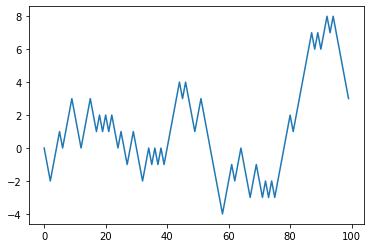

In [10]:
# 从0开始，步进为1或-1，且两种情况概率相等
# a pure Python way using the built-in random module.
from matplotlib import pyplot as plt
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # 在[0,1]闭区间上取整数，1就进1，反之退1
    position += step
    walk.append(position)
    
plt.plot(walk[:100]) # 前100步
plt.show()

In [11]:
# using the up.random module
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [12]:
np.random.randint?

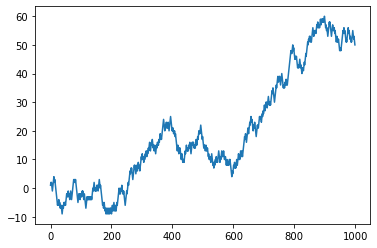

In [14]:
plt.plot(walk)
plt.show()

In [15]:
walk.min()

-9

In [16]:
walk.max()

60

In [38]:
(np.abs(walk) >= 10).argmax()
# 内部：布尔值看有无变成True .argmax计算数组中 
# 其实走了298步

297

# 4.7.1 一次性模拟多次随机漫步

In [19]:
# 二维
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2 ,size=(nwalks, nsteps)) # 0 或 1
steps = np.where(draws > 0 , 1, -1)
walks = steps.cumsum(1)
walks
# 每一行一组从0开始漫步 5000*1000

array([[ -1,   0,   1, ...,  -6,  -5,  -4],
       [ -1,  -2,  -1, ..., -18, -19, -18],
       [  1,   0,  -1, ...,  24,  23,  22],
       ...,
       [ -1,   0,  -1, ...,  -2,  -3,  -4],
       [ -1,   0,  -1, ...,  30,  29,  30],
       [  1,   0,  -1, ...,  18,  19,  20]], dtype=int32)

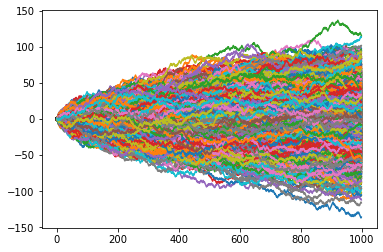

In [20]:
for i in range(5000):
    plt.plot(walks[i, :])
    
plt.show()

In [21]:
walks.max()

137

In [22]:
walks.min()

-137

In [23]:
# 计算出30或-30的最小穿越时间 .any（因为不是所有的5000个都到了30）
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ..., False,  True,  True])

In [24]:
hits30.sum()# 到达30或者-30的数字

3431

In [25]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()# 第一次穿越的平均值

506.2532789274264

In [26]:
#参数loc(float)：正态分布的均值，决定分布的位置
#参数scale(float)：正态分布的标准差，对应分布的宽度，scale越大，正态分布的曲线越矮胖，scale越小，曲线越高瘦。
#参数size(int 或者整数元组)：输出的值赋在shape里，默认为None。
steps = np.random.normal(loc=0, scale=0.25, size=((nwalks, nsteps)))

walks = steps.cumsum(1)

walks

array([[  0.03029439,   0.15286046,   0.29318334, ...,  14.17853023,
         14.39313086,  14.37308789],
       [  0.16658007,   0.10736996,  -0.09537551, ..., -11.67265739,
        -11.59098977, -11.88548553],
       [  0.23376627,   0.33292394,   0.43459851, ...,  -2.59656044,
         -2.49805768,  -2.14617613],
       ...,
       [  0.06424716,   0.21272095,   0.28844344, ...,  -4.14168749,
         -4.05815041,  -4.03726892],
       [ -0.18402932,  -0.20069813,  -0.17603488, ...,   2.36901552,
          2.33173228,   2.45985933],
       [  0.04437883,  -0.48776139,  -0.10306447, ...,   9.539326  ,
          9.68438851,   9.55129882]])

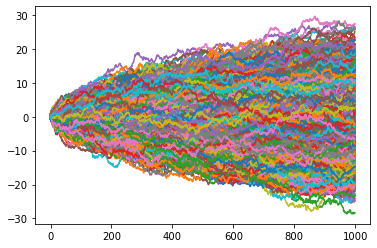

In [27]:
for i in range(5000):
    plt.plot(walks[i, :])
    
plt.show()

In [28]:
walks.max()

29.630116834752503

In [29]:
walks.min()

-28.676113306088986

In [34]:
hits20 = (np.abs(walks) >= 20).any(1)
hits20

array([False, False, False, ..., False, False, False])

In [35]:
hits20.sum()

110

In [36]:
crossing_times = (np.abs(walks[hits20]) >= 20).argmax(1)

In [37]:
crossing_times.mean()

814.6454545454545